<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada</strong></font></h1>

# Imports

In [127]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pré-processamento

In [128]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [129]:
X = data[:,0]
Y = data[:,1]

In [130]:
X[0:10]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781,
       6.4862, 5.0546])

In [131]:
Y[0:10]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233, 11.886 ,  4.3483,
       12.    ,  6.5987,  3.8166])

In [132]:
# Visualização dos dados

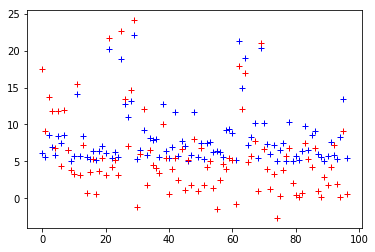

In [133]:
plt.plot(X,"b+")
plt.plot(Y,"r+")
plt.show()

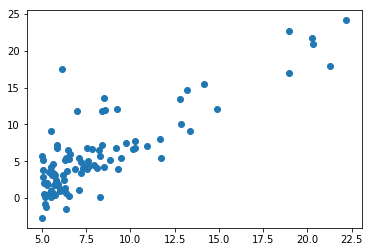

In [134]:
plt.scatter(X,Y)
plt.show()

In [ ]:
x = np.ones((data.shape[0],2))
x[:,1] = X
y = Y

In [ ]:
x[:10]

# Separando os labels em conjuntos de treino e teste

In [ ]:
X_train = x[:-20]
X_test =  x[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Definindo pesos

In [ ]:
w = np.zeros((2,1))
print(w[0])
print(len(w))

# Setando parâmetros

In [ ]:

learning_rate = 0.0005
n_epochs = 1000
n = X_train.shape[0]
eqm = []

# Rodando o modelo iterativamente

In [ ]:
for i in range(n_epochs):
    ind = np.random.permutation(n)
    x = X_train[ind,:]
    y = y_train[ind]
    erro_total = 0
    for j in range(n):
        y_barra = np.matmul(X_train[j,:],w)
        erro = y_train[j] - y_barra[0]
        erro_total = erro_total + ((erro*erro))
        w[0] = w[0] + (learning_rate*erro)
        w[1] = w[1] + (learning_rate*erro*X_train[j,1])
    eqm.append(erro_total/float(n))
    
eixo_x = range(0,n_epochs)

plt.plot(eixo_x,eqm)
plt.ylabel("EQM")
plt.xlim((0,n_epochs))
plt.xlabel("Epochs")
plt.show()

# Obtendo pesos finais, calculando o y predito e o erro quadrado médio

In [ ]:
# exibindo os pesos finais
a,b = w[0],w[1]
print(a)
print(b)

In [ ]:
# calculando y_pred e exibindo
y_pred = (b*X_test[:,1])+a
print(y_pred)

In [ ]:
# calculando erro quadrado médio e exibindo
mse = np.mean((y_test - y_pred)**2)
print(mse)

In [ ]:
eqm[-1]

----------------------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada com Scikit Learn</strong></font></h1>


<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Pré-processamento

In [ ]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [ ]:
X = data[:,0]
Y = data[:,1]

In [ ]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

# Separando os conjuntos de treino e teste

In [ ]:
X_train = X[:-20]
X_test =  X[-20:]
y_train = Y[:-20]
y_test = Y[-20:]

In [ ]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Usando Scikit-Learn

In [ ]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [ ]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

In [ ]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [ ]:
# Coeficiente
print('Coefficients: \n', regr.intercept_, regr.coef_)

In [ ]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

In [ ]:
# Imprimir saídas
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

--------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada</strong></font></h1>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

# Pre-processamento

In [ ]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [ ]:
data[:10,:]

In [ ]:
var = data[:,0:2]
Y = data[:,2]

In [ ]:
x = np.ones((data.shape[0],data.shape[1]))

In [ ]:
x[:,1:3] = var
y = Y

In [ ]:
print(x[:10,:])
print(y[:10])

# Dividindo treino e teste

In [ ]:
X_train = x[:-20]
X_test =  x[-20:]

In [ ]:
y_train = y[:-20]
y_test = y[-20:]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Aplicação da fórmula fechada dos mínimos quadrados

In [ ]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [ ]:
w.shape

In [ ]:
# Criaremos a variável "wish" pois nela teremos o shape desejado e faremos a conversão de "w" para "wish"
wish = np.zeros((3,1))

In [ ]:
wish[:,0] = w

In [ ]:
wish.shape

In [ ]:
print(wish)

# Obtenção do y-predito

In [ ]:
y_predict = (X_test).dot(wish)

In [ ]:
y_predict.shape, y_test.shape

In [ ]:
y_predict = np.reshape(y_predict,(20))

In [ ]:
y_predict.shape

# Cálculo do erro quadrado médio

In [ ]:
mse = np.mean((y_test - y_predict)**2)

In [ ]:
mse

----------------------------



<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada com scikit learn</strong></font></h1>

<a href="https://scikit-learn.org/stable/"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png" width = 250, align = "center"></a>

Métricas:
    - mean squared error:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Pré-processamento

In [ ]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [ ]:
X = data[:,0:2]
Y = data[:,2]

In [ ]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

# Separando em conjuntos de treino e de teste


In [ ]:
X_train = X[:-20]
X_test =  X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# Usando Scikit Learn para rodar nosso experimento

In [ ]:
# regr vai ser nosso objeto da regressão linear
regr = linear_model.LinearRegression()

In [ ]:
# Vamos agora dar o "fit" para treinar com os conjuntos de treino 
regr.fit(X_train, y_train)

In [ ]:
# Usar o .predict para extrair as prediçoes usando o conjunto de teste
y_pred = regr.predict(X_test)

In [ ]:
# Coeficiente
print('Coefficients: \n', regr.coef_, regr.intercept_)

In [ ]:
# Erro médio quadrado
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

-------------------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear univariada usando tensorflow</strong></font></h1>

<a href="https://www.tensorflow.org/?hl=pt-br"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1280px-TensorFlowLogo.svg.png" width = 200, align = "center"></a>

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Pré-processamento

In [3]:
data = np.loadtxt("dataset_regressao01.txt", dtype = float, delimiter = ',')

In [4]:
type(data)

numpy.ndarray

In [5]:
X = data[:,0]
Y = data[:,1]

# Dividindo conjuntos de treino e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
print(X_train.shape)
print("----------------------------------------------------------------------")
print(y_train.shape)
print(type(y_train))

(77,)
----------------------------------------------------------------------
(77,)
<class 'numpy.ndarray'>


## Definindo hiper-parâmetros

In [8]:
learning_rate = 0.0005
n_epochs = 3000

## Reset nas configurações do grafo de execução

In [9]:
tf.reset_default_graph()

## Setando Grafo

In [10]:
# place_X = tf.constant( X_train, dtype = tf.float32 ,name = "X")
# place_y = tf.constant(y_train, dtype = tf.float32,name = "y")
# place_X = tf.Variable( X_train, dtype = tf.float32 ,name = "X")
# place_y = tf.Variable( y_train, dtype = tf.float32 ,name = "y")
place_X = tf.placeholder(tf.float32)
place_y = tf.placeholder(tf.float32)

# Setando pesos do modelo

In [11]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

# Definindo nossa predição

In [12]:
y_pred = tf.add(tf.multiply(place_X,W), b)

# Definindo funçao de custo

In [13]:
loss = tf.losses.mean_squared_error(place_y,y_pred)

# Definindo nosso otimizador

In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Inicializando nossas variaveis

In [15]:
init = tf.global_variables_initializer()

# Rodando grafo

In [16]:
# Rodando com tf.placeholder
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for (x,y) in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={place_X: x, place_y: y})
        if (epoch+1) % 100 == 0:
            c = sess.run(loss, feed_dict={place_X: X_train, place_y: y_train})
            print("Epoch:", (epoch+1), "cost =", c)
            
    w_final, b_final = sess.run([W,b])

Epoch: 100 cost = 9.953078
Epoch: 200 cost = 9.373734
Epoch: 300 cost = 8.949551
Epoch: 400 cost = 8.644139
Epoch: 500 cost = 8.427108
Epoch: 600 cost = 8.27445
Epoch: 700 cost = 8.167888
Epoch: 800 cost = 8.093911
Epoch: 900 cost = 8.04276
Epoch: 1000 cost = 8.007497
Epoch: 1100 cost = 7.983232
Epoch: 1200 cost = 7.9665637
Epoch: 1300 cost = 7.955125
Epoch: 1400 cost = 7.94728
Epoch: 1500 cost = 7.9419026
Epoch: 1600 cost = 7.9382205
Epoch: 1700 cost = 7.9356985
Epoch: 1800 cost = 7.9339733
Epoch: 1900 cost = 7.932794
Epoch: 2000 cost = 7.931988
Epoch: 2100 cost = 7.931437
Epoch: 2200 cost = 7.9310617
Epoch: 2300 cost = 7.930805
Epoch: 2400 cost = 7.9306316
Epoch: 2500 cost = 7.9305124
Epoch: 2600 cost = 7.930433
Epoch: 2700 cost = 7.930378
Epoch: 2800 cost = 7.930342
Epoch: 2900 cost = 7.930317
Epoch: 3000 cost = 7.9303


In [ ]:
#Rodando com tf.variable e tf.contant
# with tf.Session() as sess:
#     sess.run(init)
#     for epoch in range(n_epochs):
#         sess.run(optimizer)
#         if (epoch+1) % 100 == 0:
#             c = sess.run(loss)
#             print("Epoch:", (epoch+1), "cost =", c)
            
#     w_final, b_final = sess.run([W,b])

# Exibindo pesos finais

In [50]:
print(w_final)
print(b_final)

0.72814995
1.7144613


# Calculando y predito

In [51]:
y_pred = (w_final*X_test[:])+b_final
print(y_pred)

[ 5.67333979 16.52575947  5.63147117  8.1406759   6.0045752   5.38178855
  6.72595336 11.46730176  6.9703933   7.20369254  5.65149529  5.82173675
  5.40632721  7.83703737  7.25065822  7.12017374  6.34236397  6.43738754
  5.71207737  7.91727949]


# Calculando erro quadrado médio 

In [52]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

11.90365032494538


---------------------

<h1 align=center><font size = 8><strong>Exemplo regressão linear multivariada usando tensorflow</strong></font></h1>

<a href="https://www.tensorflow.org/?hl=pt-br"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1280px-TensorFlowLogo.svg.png" width = 200, align = "center"></a>

# Imports

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Pré-processamento

In [72]:
data = np.loadtxt("dataset_regressao02.txt", dtype = float)

In [73]:
X = data[:,0:2]
Y = data[:,2]

In [74]:
print("Shape de x:",X.shape)
print("Shape de y:",Y.shape)

Shape de x: (47, 2)
Shape de y: (47,)


# Dividindo os conjuntos em treino e teste

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Definindo parâmetros

In [76]:
learning_rate = 0.0001
n_epochs = 7000

# Definindo o reset do grafo de execução

In [77]:
tf.reset_default_graph()

# Definindo nossas variáveis do modelo

In [78]:
# place_X1 = tf.constant( X_train[:,0], dtype = tf.float32 ,name = "X1")
# place_X2 = tf.constant( X_train[:,1], dtype = tf.float32 ,name = "X2")
# place_y = tf.constant(y_train, dtype = tf.float32,name = "y")
# place_X1 = tf.Variable( X_train[:,0], dtype = tf.float32, name = "X1")
# place_X2 = tf.Variable( X_train[:,1], dtype = tf.float32, name = "X2")
# place_y = tf.Variable( y_train, dtype = tf.float32 ,name = "y")
place_X1 = tf.placeholder(tf.float32)
place_X2 = tf.placeholder(tf.float32)
place_y =  tf.placeholder(tf.float32)


In [79]:
W1 = tf.Variable(np.random.randn(), name = "W1")
W2 = tf.Variable(np.random.randn(), name = "W2")
b = tf.Variable(np.random.randn(), name = "b") 

# Definindo calculo do modelo 

In [80]:
termo1 = tf.multiply(place_X1,W1)

In [81]:
termo2 = tf.multiply(place_X2,W2)

# Definindo cálculo das predições

In [82]:
y_pred = tf.add(tf.add(termo1,termo2),b)

# Definindo função de custo

In [83]:
loss = tf.losses.mean_squared_error(place_y,y_pred)

# Definindo nosso médoto de descida

In [84]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Inicializando variáveis do tensorflow

In [85]:
init = tf.global_variables_initializer()

# Rodando grafo de execução

In [87]:
# Rodando com tf.placeholder
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for (x1,x2,y) in zip(X_train[:,0], X_train[:,1], y_train):
            sess.run(optimizer, feed_dict={place_X1: x1, place_X2: x2, place_y: y})
        if (epoch+1) % 100 == 0:
            c = sess.run(loss, feed_dict={place_X1: X_train[:,0], place_X2: X_train[:,1],place_y: y_train})
            print("Epoch:", (epoch+1), "cost =", c)
            
    w1_final, w2_final, b_final = sess.run([W1, W2, b])

Epoch: 100 cost = 20.111395
Epoch: 200 cost = 7.3250914
Epoch: 300 cost = 1.6929928
Epoch: 400 cost = 0.69574904
Epoch: 500 cost = 0.64781904
Epoch: 600 cost = 0.6270684
Epoch: 700 cost = 0.6079709
Epoch: 800 cost = 0.5902247
Epoch: 900 cost = 0.5737726
Epoch: 1000 cost = 0.55855983
Epoch: 1100 cost = 0.5445303
Epoch: 1200 cost = 0.5316269
Epoch: 1300 cost = 0.5197893
Epoch: 1400 cost = 0.5089611
Epoch: 1500 cost = 0.49907804
Epoch: 1600 cost = 0.49008375
Epoch: 1700 cost = 0.48191863
Epoch: 1800 cost = 0.474527
Epoch: 1900 cost = 0.46784726
Epoch: 2000 cost = 0.4618256
Epoch: 2100 cost = 0.45640904
Epoch: 2200 cost = 0.45154792
Epoch: 2300 cost = 0.4471942
Epoch: 2400 cost = 0.44330072
Epoch: 2500 cost = 0.439825
Epoch: 2600 cost = 0.43672583
Epoch: 2700 cost = 0.43397048
Epoch: 2800 cost = 0.43151954
Epoch: 2900 cost = 0.42934483
Epoch: 3000 cost = 0.42741674
Epoch: 3100 cost = 0.4257109
Epoch: 3200 cost = 0.42419997
Epoch: 3300 cost = 0.42286518
Epoch: 3400 cost = 0.42168534
Epoch: 

In [88]:
# Rodando com tf.variable e tf.constantes
# with tf.Session() as sess:
#     sess.run(init)
#     for epoch in range(n_epochs):
#         sess.run(optimizer)
#         if (epoch+1) % 1000 == 0:
#             c = sess.run(loss)
#             print("Epoch:", (epoch+1), "cost =", c)
#     w1_final, w2_final, b_final = sess.run([W1, W2, b])

# Exibindo pesos otimizados

In [89]:
print(w1_final)
print(w2_final)
print(b_final)

1.2622647
-0.04411164
0.9724615


# Calculado y predito do teste

In [90]:
y_pred = (w1_final*X_test[:,0])+(w2_final*X_test[:,1])+b_final
print(y_pred)

[4.02860731 2.40028581 6.40432478 2.7764407  4.58280915 2.64137837
 4.03624852 2.35484428 2.35863107 4.79985106]


# Calculando erro quadrado médio do teste

In [91]:
mse = np.mean((y_test - y_pred)**2)
print(mse)

0.43876894723016757
